In [1]:
import math
import numpy as np
import random
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

In [2]:
# def smoothen(waypoints):
#     optimumpointlist = []
#     i = 0
#     range_factor = 6
#     avg_factor = 2 * range_factor + 1
#     num_of_waypoints = len(waypoints)

#     for point in waypoints:
#         counter = 0
#         estimated_x_cord = point[0]
#         estimated_y_cord = point[1]
#         while counter < range_factor:
#             estimated_x_cord += waypoints[(i + (counter + 1)) % num_of_waypoints][0]
#             estimated_x_cord += waypoints[(i - (counter + 1)) % num_of_waypoints][0]

#             estimated_y_cord += waypoints[(i + (counter + 1)) % num_of_waypoints][1]
#             estimated_y_cord += waypoints[(i - (counter + 1)) % num_of_waypoints][1]
#             counter += 1

#         estimated_x_cord = estimated_x_cord / avg_factor
#         estimated_y_cord = estimated_y_cord / avg_factor


#         optimumpointlist.append(np.array( (estimated_x_cord, estimated_y_cord) ))

#         i += 1
#     return np.array(optimumpointlist)

In [3]:
# def calc_distance(prev_point, next_point):
#     delta_x = next_point[0] - prev_point[0]
#     delta_y = next_point[1] - prev_point[1]
#     return math.hypot(delta_x, delta_y)

# def smooth_central_line(center_line, max_offset, pp=0.10, p=0.05, c=0.70, n=0.05, nn=0.10, iterations=72, skip_step=1):
#     if max_offset < 0.0001:
#         return center_line
#     if skip_step < 1:
#         skip_step = 1
#     smoothed_line = center_line
#     for i in range(0, iterations):
#         smoothed_line = smooth_central_line_internal(center_line, max_offset, smoothed_line, pp, p, c, n, nn, skip_step)
#     return smoothed_line


# def smooth_central_line_internal(center_line, max_offset, smoothed_line, pp, p, c, n, nn, skip_step):
#     length = len(center_line)
#     new_line = [[0.0 for _ in range(2)] for _ in range(length)]
#     for i in range(0, length):
#         wpp = smoothed_line[(i - 2 * skip_step + length) % length]
#         wp = smoothed_line[(i - skip_step + length) % length]
#         wc = smoothed_line[i]
#         wn = smoothed_line[(i + skip_step) % length]
#         wnn = smoothed_line[(i + 2 * skip_step) % length]
#         new_line[i][0] = pp * wpp[0] + p * wp[0] + c * wc[0] + n * wn[0] + nn * wnn[0]
#         new_line[i][1] = pp * wpp[1] + p * wp[1] + c * wc[1] + n * wn[1] + nn * wnn[1]
#         while calc_distance(new_line[i], center_line[i]) >= max_offset:
#             new_line[i][0] = (0.98 * new_line[i][0]) + (0.02 * center_line[i][0])
#             new_line[i][1] = (0.98 * new_line[i][1]) + (0.02 * center_line[i][1])
#     return new_line

In [4]:
TRACK_NAME = 'C:/Users/suraj/projects/deepracer24/FS_June2020.npy'

# Load the center, inner, outer waypoints
waypoints = np.load(TRACK_NAME)

center_line = waypoints[:,0:2]
inner_border = waypoints[:,2:4]
outer_border = waypoints[:,4:6]

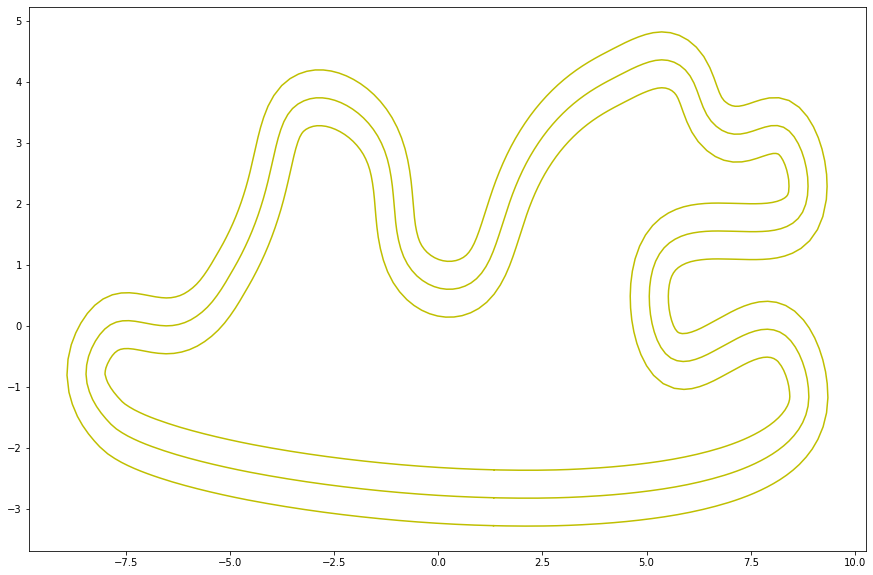

In [5]:
plt.plot(center_line[:,0], center_line[:,1], label = 'outer_border', c = 'y')
plt.plot(inner_border[:,0], inner_border[:,1], label = 'outer_border', c = 'y')
plt.plot(outer_border[:,0], outer_border[:,1], label = 'outer_border', c = 'y')
# plt.plot(smooth_path[:,0], smooth_path[:,1], label = 'outer_border', c = 'k')
# for i, point in enumerate(smooth_path):
#     point = list(point)        
#     plt.scatter(point[0], point[1], s = optimal_velocity_[i]*10, c = 'k' if optimal_velocity_[i]<2 else 'r')

# plt.scatter(target[0], target[1], c = 'g', s = 5)
# i = 100
# p1 = inner_border[i]
# p2 = outer_border[i]

# plt.scatter(p1[0], p1[1], label = 'inner border point', c = 'r', s = 10)
# plt.scatter(p2[0], p2[1], label = 'outer border point', c = 'r', s = 10)

plt.show()

In [6]:
from reward_function import Utils, SpeedUtils, SteeringUtils, Path, SmoothPath, reward_function

In [7]:
len(center_line)

354

In [8]:
# smooth_path = smoothen(center_line)
path_object = Path( center_line, 2 )
smooth_path = path_object.get()
# smooth_path = SmoothPath( center_line, 1.07*0.45*0.5,skip_step=1 )
# smooth_path_45 = smooth_central_line( center_line, 1.07*0.45*0.5,skip_step=1 )
smooth_path = np.array( [ np.array(point) for point in smooth_path ] )
# smooth_path_45 = np.array( [ np.array(point) for point in smooth_path_45 ] )
# smooth_path = up_sample(smooth_path, 10)
print(len(smooth_path))

calculating smooth path
354


In [9]:
p = path_object.get()
p

[[1.2621930349402002, -2.7985880761449238],
 [1.119392496071578, -2.796033804010889],
 [0.9764283180609415, -2.7930358790204775],
 [0.8331968215970158, -2.7895988958992195],
 [0.689606703812799, -2.7857266208688034],
 [0.5455826669179885, -2.7814221333624887],
 [0.40106790530364955, -2.7766879635740533],
 [0.2560252931643332, -2.7715262169894435],
 [0.11043732316282878, -2.7659386799979813],
 [-0.035695120760197034, -2.7599269014197993],
 [-0.18235491161031012, -2.7534922481787545],
 [-0.3295115104299425, -2.7466359344241176],
 [-0.4771241608180906, -2.7393590261550163],
 [-0.6251451859830943, -2.7316624239613234],
 [-0.7735231205698878, -2.723546828036232],
 [-0.9222055000269215, -2.7150126893741784],
 [-1.0711411644760573, -2.7060601514423315],
 [-1.220282023118338, -2.696688985760238],
 [-1.3695842635199176, -2.6868985244355956],
 [-1.5190090520542827, -2.6766875916131943],
 [-1.6685227917273149, -2.6660544351017688],
 [-1.8180970307981323, -2.654996658429775],
 [-1.967708113419803,

In [10]:
def circle_radius(coords):

    # Flatten the list and assign to variables (makes code easier to read later)
    x1, y1, x2, y2, x3, y3 = [i for sub in coords for i in sub]

    a = x1*(y2-y3) - y1*(x2-x3) + x2*y3 - x3*y2
    b = (x1**2+y1**2)*(y3-y2) + (x2**2+y2**2)*(y1-y3) + (x3**2+y3**2)*(y2-y1)
    c = (x1**2+y1**2)*(x2-x3) + (x2**2+y2**2)*(x3-x1) + (x3**2+y3**2)*(x1-x2)
    d = (x1**2+y1**2)*(x3*y2-x2*y3) + (x2**2+y2**2) * \
        (x1*y3-x3*y1) + (x3**2+y3**2)*(x2*y1-x1*y2)

    # In case a is zero (so radius is infinity)
    try:
        r = abs((b**2+c**2-4*a*d) / abs(4*a**2)) ** 0.5
    except:
        r = 999

    return r

def circle_indexes(mylist, index_car, add_index_1=0, add_index_2=0):

    list_len = len(mylist)

    # if index >= list_len:
    #     raise ValueError("Index out of range in circle_indexes()")

    # Use modulo to consider that track is cyclical
    index_1 = (index_car + add_index_1) % list_len
    index_2 = (index_car + add_index_2) % list_len

    return [index_car, index_1, index_2]

def optimal_velocity(track, min_speed, max_speed, look_ahead_points):

    # Calculate the radius for every point of the track
    radius = []
    for i in range(len(track)):
        indexes = circle_indexes(track, i, add_index_1=-1, add_index_2=1)
        coords = [track[indexes[0]],
                  track[indexes[1]], track[indexes[2]]]
        radius.append(circle_radius(coords))

    # Get the max_velocity for the smallest radius
    # That value should multiplied by a constant multiple
    v_min_r = min(radius)**0.5
    constant_multiple = min_speed / v_min_r
    print(f"Constant multiple for optimal speed: {constant_multiple}")

    if look_ahead_points == 0:
        # Get the maximal velocity from radius
        max_velocity = [(constant_multiple * i**0.5) for i in radius]
        # Get velocity from max_velocity (cap at MAX_SPEED)
        velocity = [min(v, max_speed) for v in max_velocity]
        return velocity

    else:
        # Looks at the next n radii of points and takes the minimum
        # goal: reduce lookahead until car crashes bc no time to break
        LOOK_AHEAD_POINTS = look_ahead_points
        radius_lookahead = []
        for i in range(len(radius)):
            next_n_radius = []
            for j in range(LOOK_AHEAD_POINTS+1):
                index = circle_indexes(
                    mylist=radius, index_car=i, add_index_1=j)[1]
                next_n_radius.append(radius[index])
            radius_lookahead.append(min(next_n_radius))
        max_velocity_lookahead = [(constant_multiple * i**0.5)
                                  for i in radius_lookahead]
        velocity_lookahead = [min(v, max_speed)
                              for v in max_velocity_lookahead]
        return velocity_lookahead

In [11]:
# optimal_speeds, tp, angleChange = optimalSpeed()
optimal_velocity_ =  SpeedUtils.optimal_velocity(smooth_path, 1.3, 4.0, 10)
# optimal_velocity_ =  optimal_velocity(smooth_path, 1, 4.0, 1)

In [12]:
import pandas as pd

data = pd.read_csv('C:/Users/suraj/projects/deepracer24/deepracer-log-guru/logs/033/training_data.csv')
status_col = 'episode_status' if 'episode_status' in data.columns else 'status'
data = data[data[status_col].isin(['in_progress', 'on_track'])]
data.rename(columns={'X':'x', 'Y':'y', 'yaw':'heading', 'steer':'steering_angle', 'throttle':'speed', 'closest_waypoint': 'closest_waypoints'}, inplace=True)
data['is_offtrack'] = ~data['on_track']
data['all_wheels_on_track'] = data['on_track']
data['distance_from_center'] = 0.1
data['is_left_of_center'] = False
data['is_crashed'] = False
data = data[['x', 'y', 'heading', 'speed', 'steering_angle', 'progress', 'is_left_of_center', 'closest_waypoints', 'steps', 'is_offtrack', 'is_crashed', 'all_wheels_on_track', 'distance_from_center']]
data.shape

(33717, 13)

In [13]:
# data = data[data['is_offtrack']==True]
# data.shape

In [14]:
def get_params(row_number):
    params = data.iloc[row_number].to_dict()
    params['closest_waypoints'] = [ params['closest_waypoints'], params['closest_waypoints']+1 ]
    # print(params)

    params['waypoints'] = list( [list(point) for point in center_line] )
    params['track_width'] = 1.07
    params['is_reversed'] = False

    return params

In [15]:
params = get_params(805)
print(params)
print( reward_function( params ) )

{'x': 0.7353, 'y': 5.3888, 'heading': 172.424, 'speed': 2.5, 'steering_angle': 0, 'progress': 2.2663, 'is_left_of_center': False, 'closest_waypoints': [28, 29], 'steps': 7, 'is_offtrack': False, 'is_crashed': False, 'all_wheels_on_track': True, 'distance_from_center': 0.1, 'waypoints': [[1.3333835005760193, -2.8131200075149536], [1.183136522769928, -2.8104419708251953], [1.0328985452651978, -2.8073339462280273], [0.8826694488525391, -2.8037965297698975], [0.7324512302875519, -2.7998324632644653], [0.5822446346282959, -2.795442581176758], [0.43205125629901886, -2.790626049041748], [0.28187204897403717, -2.7853859663009644], [0.1317080482840538, -2.7797240018844604], [-0.018439327308443748, -2.773640990257263], [-0.16856930404901505, -2.7671384811401367], [-0.3186803460121155, -2.7602174282073975], [-0.4687718003988266, -2.752879023551941], [-0.6188421547412863, -2.7451255321502686], [-0.7688906490802765, -2.736956477165222], [-0.918916046619416, -2.7283765077590942], [-1.068917512893676

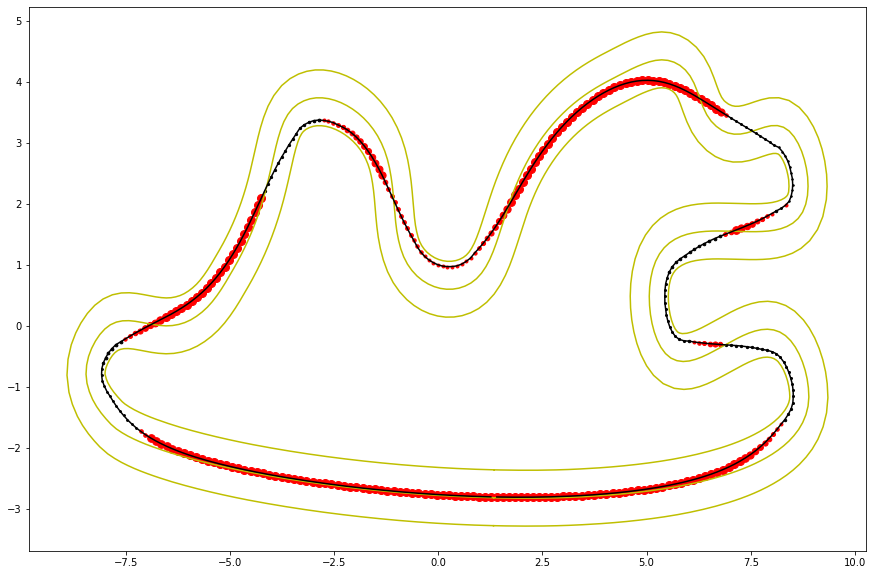

In [16]:
plt.plot(center_line[:,0], center_line[:,1], label = 'outer_border', c = 'y')
plt.plot(inner_border[:,0], inner_border[:,1], label = 'outer_border', c = 'y')
plt.plot(outer_border[:,0], outer_border[:,1], label = 'outer_border', c = 'y')
plt.plot(smooth_path[:,0], smooth_path[:,1], label = 'outer_border', c = 'k')
for i, point in enumerate(smooth_path):
    point = list(point)        
    try:
        plt.scatter(point[0], point[1], s = optimal_velocity_[i]**3, c = 'k' if optimal_velocity_[i]<2 else 'r')
    except:
        print(point)

plt.show()

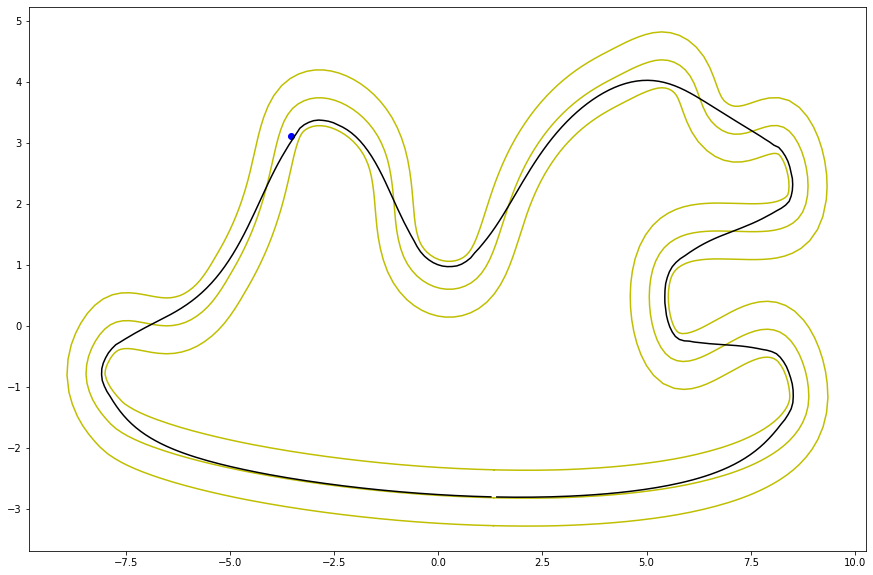

In [17]:
target = [-3.52613775941606, 3.108002357052378]
params['x'] = target[0]
params['y'] = target[1]
params['steering_angle'] = 0.52
params['heading'] = 20
params['speed'] = 1.5
plt.scatter(params['x'], params['y'], c = 'b')


plt.plot(center_line[:,0], center_line[:,1], label = 'outer_border', c = 'y')
plt.plot(inner_border[:,0], inner_border[:,1], label = 'outer_border', c = 'y')
plt.plot(outer_border[:,0], outer_border[:,1], label = 'outer_border', c = 'y')
plt.plot(smooth_path[:,0], smooth_path[:,1], label = 'outer_border', c = 'k')
# for i, point in enumerate(smooth_path):
#     point = list(point)        
#     plt.scatter(point[0], point[1], s = optimal_velocity_[i]*10, c = 'k' if optimal_velocity_[i]<2 else 'r')

# plt.scatter(target[0], target[1], c = 'g', s = 5)

plt.show()


In [37]:
reward_function(params)

----------------------------------------------------------------------------------------------------
parmas:  {'x': -3.52613775941606, 'y': 3.108002357052378, 'heading': 20, 'speed': 1.5, 'steering_angle': 0.52, 'progress': 2.2663, 'is_left_of_center': False, 'closest_waypoints': [28, 29], 'steps': 7, 'is_offtrack': False, 'is_crashed': False, 'all_wheels_on_track': True, 'distance_from_center': 0.1, 'track_width': 1.07, 'is_reversed': False}
----------------------------------------------------------------------------------------------------
steering_reward:  0.934189857578054 distance_reward:  0.9918854344057196 speed_reward:  0.9057984970551767 progress factor:  1 total:  2.8318737890389505


2.8318737890389505

In [18]:
def getEverything(racing_track, min_speed = 1.3, max_speed = 4, lookahead = 10):

    def dist_2_points(x1, x2, y1, y2):
        return abs(abs(x1-x2)**2 + abs(y1-y2)**2)**0.5

    velocity =  SpeedUtils.optimal_velocity(racing_track, min_speed, max_speed, lookahead)

    distance_to_prev = []
    for i in range(len(racing_track)):
        indexes = SpeedUtils.circle_indexes(racing_track, i, add_index_1=-1, add_index_2=0)[0:2]
        coords = [racing_track[indexes[0]],racing_track[indexes[1]]]
        dist_to_prev = dist_2_points(x1=coords[0][0], x2=coords[1][0], y1=coords[0][1], y2=coords[1][1])
        distance_to_prev.append(dist_to_prev)
        
    time_to_prev = [(distance_to_prev[i]/velocity[i]) for i in range(len(racing_track))]

    total_time = sum(time_to_prev)
    print(f"Total time for track, if racing line and speeds are followed perfectly: {total_time} s")

    # Now we have list with columns (x,y,speed,distance,time)
    racing_track_everything = []
    for i in range(len(racing_track)):
        racing_track_everything.append([racing_track[i][0],
                                        racing_track[i][1],
                                        velocity[i],
                                        time_to_prev[i]])
    # Round to 5 decimals
    racing_track_everything = np.around(racing_track_everything, 5).tolist()

    return racing_track_everything

In [19]:
getEverything(smooth_path)

Total time for track, if racing line and speeds are followed perfectly: 19.464531509530552 s


[[1.26219, -2.79859, 4.0, 0.03569],
 [1.11939, -2.79603, 4.0, 0.03571],
 [0.97643, -2.79304, 4.0, 0.03575],
 [0.8332, -2.7896, 4.0, 0.03582],
 [0.68961, -2.78573, 4.0, 0.03591],
 [0.54558, -2.78142, 4.0, 0.03602],
 [0.40107, -2.77669, 4.0, 0.03615],
 [0.25603, -2.77153, 4.0, 0.03628],
 [0.11044, -2.76594, 4.0, 0.03642],
 [-0.0357, -2.75993, 4.0, 0.03656],
 [-0.18235, -2.75349, 4.0, 0.0367],
 [-0.32951, -2.74664, 4.0, 0.03683],
 [-0.47712, -2.73936, 4.0, 0.03695],
 [-0.62515, -2.73166, 4.0, 0.03706],
 [-0.77352, -2.72355, 4.0, 0.03715],
 [-0.92221, -2.71501, 4.0, 0.03723],
 [-1.07114, -2.70606, 4.0, 0.0373],
 [-1.22028, -2.69669, 4.0, 0.03736],
 [-1.36958, -2.6869, 4.0, 0.03741],
 [-1.51901, -2.67669, 4.0, 0.03744],
 [-1.66852, -2.66605, 4.0, 0.03747],
 [-1.8181, -2.655, 4.0, 0.0375],
 [-1.96771, -2.64351, 4.0, 0.03751],
 [-2.11734, -2.63159, 4.0, 0.03753],
 [-2.26697, -2.61924, 4.0, 0.03753],
 [-2.41659, -2.60645, 4.0, 0.03754],
 [-2.56618, -2.5932, 4.0, 0.03755],
 [-2.71575, -2.5795, 

In [20]:
rewards = []
for i in random.sample(range(0, len(data)), 500):
    params = get_params(i)
    rewards.append( reward_function( params ) )
    if i%50 == 0:
        print(i, ' rows done')
rewards_df = pd.DataFrame({'rewards':rewards})

20650  rows done
8900  rows done
16900  rows done
8200  rows done
7650  rows done
2900  rows done
28950  rows done
28350  rows done
29950  rows done
29100  rows done
1050  rows done
19700  rows done
25550  rows done


In [21]:
rewards_df.describe()

,rewards
count,500.000000
mean,0.040122
std,0.347547
min,0.001000
25%,0.001000
50%,0.001000
75%,0.001000
max,4.677721


In [ ]:
def normalize_reward(reward):
    old_value = reward
    old_min = 0.17
    old_max = 2.5
    new_min = -1
    new_max = 1
    new_value = ( (old_value - old_min) / float(old_max - old_min) ) * (new_max - new_min) + new_min
    return new_value

# rs = [normalize_reward(r) for r in compare_df['new'].tolist()]
normalize_reward(3.5)

1.8583690987124464

In [ ]:
# y = lambda x: ( 1/( (1+float(abs(x)) ) ) - 0.25 ) * 1.3333333
steering_reward = lambda x: max(1e-3, (1 - abs(x)/60.0)-0.5)*2
speed_reward    = lambda x: max(1e-3, 0.5 - abs(x)/(4.0-1.1))*2
ontrack_reward  = lambda x: max(1e-3, 0.5 - (abs(x)/(1.07)))*2
total_reward    = lambda x: steering_reward(x) + speed_reward(x) + ontrack_reward(x)
y = speed_reward

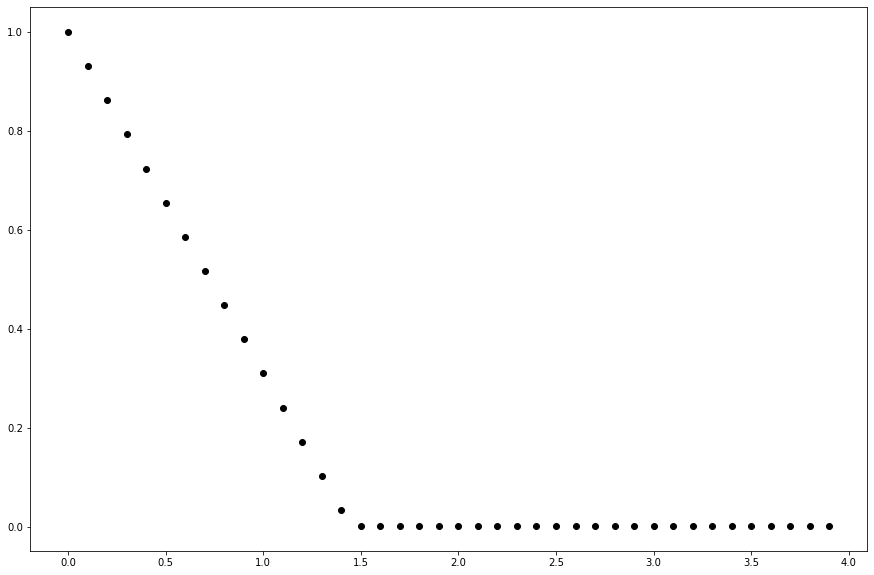

In [ ]:
for i in range(0, 40):
    x = i/10
    plt.scatter(x, y(x),c='k')
    # plt.scatter(x, 1 - abs(x/60), c='b')
plt.show()

In [ ]:
# print(max(1-abs(0.8), 1e-3))
y(1.5)

0.19999999500000004

In [ ]:
optimal_speed_penalty = lambda diff, optimal_speed: max(0, 1 - abs(diff) / optimal_speed)

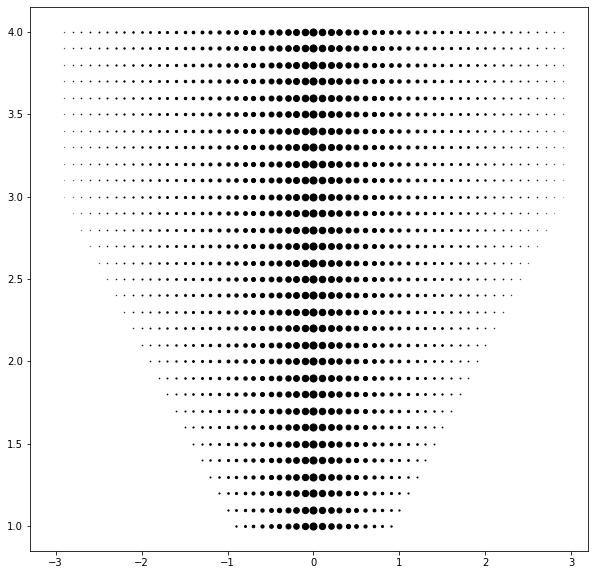

In [ ]:
for diff in range(-30, 30):
    diff = diff/10
    for optimal_velocity in range(10, 41):
        optimal_velocity = optimal_velocity/10
        penalty = optimal_speed_penalty(diff, optimal_velocity)
        
        reward = y(diff) * penalty
        plt.scatter(diff, optimal_velocity, s = reward*50 , c = 'k')
plt.show()

In [ ]:
sp = Path(center_line).get()

In [ ]:
closest = Path(center_line).closest((params['x'], params['y']), 2)
prev = closest[0]
nex = closest[1]

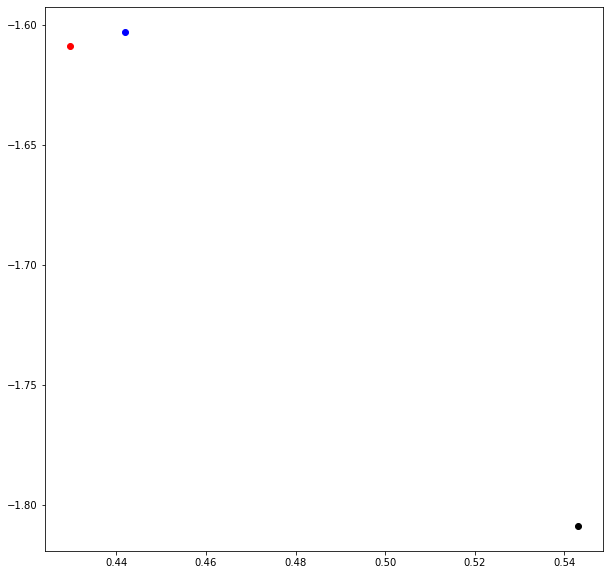

In [ ]:
plt.scatter(params['x'], params['y'], c = 'k')
plt.scatter(prev[0], prev[1], c = 'b')
plt.scatter(nex[0], nex[1], c = 'r')
plt.show()

In [ ]:
Utils.distanceFromLine(prev, nex, (params['x'], params['y']))

0.22943080917732178

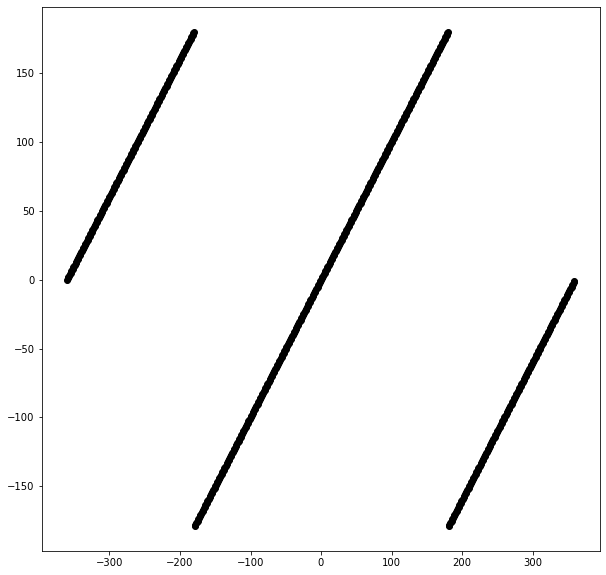

In [ ]:
for angle in range(-360, 360):
    plt.scatter(angle, Utils.normalize_angle(angle), c = 'k')
plt.show()

In [ ]:
from reward_function import Utils

Utils.normalize_angle( Utils.angle_between_points( (1, 1), (0, 0) ) - 135 ) - -45

135.0

In [ ]:
dist = 0
prev_point = center_line[0]
for point in center_line[1:]:
    dist += Utils.distance( prev_point, point )
    prev_point = point
dist

42.1918841751529

In [ ]:
0.999**1000 - 0.3586

0.009095424770963756

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
y = lambda factor, steps: max( factor**steps - 0.3586, 0 )

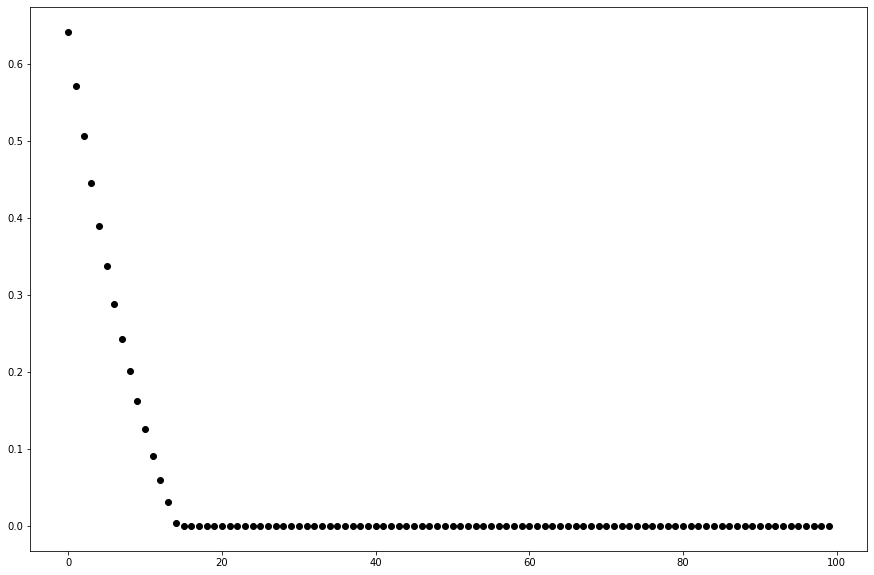

15


In [ ]:
factor = 0.93
x = [i for i in range(100)]
ans = [y(factor, i) for i in x]
plt.scatter(x, ans, c = 'k')
plt.show()

for x, a in zip(x, ans):
    if a<=0:
        print(x)
        break


In [ ]:
34/len(center_line)

0.096045197740113